In [2]:
# Importing all the required libraries for EDA:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/drug200.csv')

In [4]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
df = pd.read_csv("drug200.csv")
print(df.head())
print(df.info())


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [6]:
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})


In [7]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,DrugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,0,1,11.567,drugC
196,16,1,0,1,12.006,drugC
197,52,1,1,1,9.894,drugX
198,23,1,1,0,14.020,drugX


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import defaultdict
import math


In [11]:
X = df.drop("Drug", axis=1).values
y = df["Drug"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}
        for c in self.classes:
            X_c = X[y == c]
            self.parameters[c] = {
                'mean': X_c.mean(axis=0),
                'var': X_c.var(axis=0) + 1e-9,  # avoid zero division
                'prior': X_c.shape[0] / X.shape[0]
            }

    def gaussian_pdf(self, x, mean, var):
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        return (1 / np.sqrt(2 * np.pi * var)) * exponent

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = {}
            for c in self.classes:
                prior = np.log(self.parameters[c]['prior'])
                conditional = np.sum(np.log(self.gaussian_pdf(x, self.parameters[c]['mean'], self.parameters[c]['var'])))
                posteriors[c] = prior + conditional
            predictions.append(max(posteriors, key=posteriors.get))
        return predictions


In [13]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9

Confusion Matrix:
 [[20  1  3  2  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]

Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      0.77      0.87        26
       drugA       0.88      1.00      0.93         7
       drugB       0.50      1.00      0.67         3
       drugC       0.75      1.00      0.86         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.90        60
   macro avg       0.82      0.95      0.87        60
weighted avg       0.94      0.90      0.90        60



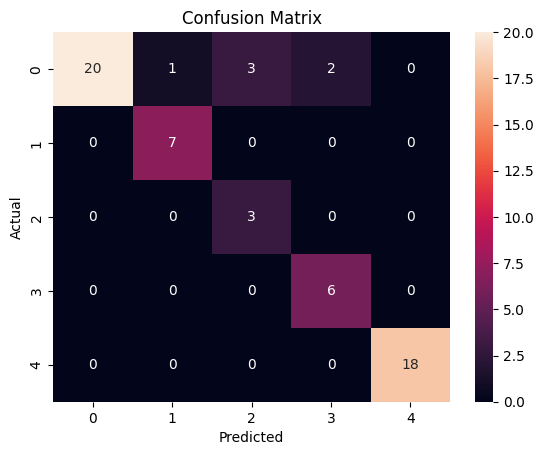

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
